In [47]:
# Importing dependecies:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import os

# Configuring Notebook environment:
sns.set()
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

plt.rcParams['figure.figsize'] = (10.0, 7.5)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

AttributeError: module 'seaborn' has no attribute 'rcParams'

# 2.0 Data Overview:

In [4]:
# Importing documents:
df = pd.read_csv('cj_single_view.csv', index_col=0, low_memory=False)
df.head()

//anaconda3/envs/Springboard/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,PRODUCT_ID,STORE_ID,WEEK_NO,display,mailer,household_key,BASKET_ID,DAY,QUANTITY,SALES_VALUE,RETAIL_DISC,TRANS_TIME,COUPON_DISC,COUPON_MATCH_DISC,DESCRIPTION,CAMPAIGN,START_DAY,END_DAY,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT,COUPON_UPC,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,affinity_raw,affinity_rank_pct,affinity_rank_centered,affinity_log,affinity_log_scaled,affinity_rank_buckets,affinity_score
0,818980,367,63,4,0,883,33385517013,434,1.0,0.67,-0.22,1252,0,0,TypeA,26,224,264,1251,GROCERY,National,BEANS - CANNED GLASS & MW,PREPARED BEANS - BAKED W/PORK,15.75 OZ,NaN,35-44,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,0.67,0.048787,-0.907653,-0.400478,0.309007,1,1
1,818980,367,63,4,0,883,33385517013,434,1.0,0.67,-0.22,1252,0,0,TypeA,30,323,369,1251,GROCERY,National,BEANS - CANNED GLASS & MW,PREPARED BEANS - BAKED W/PORK,15.75 OZ,NaN,35-44,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,0.67,0.048787,-0.907653,-0.400478,0.309007,1,1
2,818980,367,63,4,0,883,33385517013,434,1.0,0.67,-0.22,1252,0,0,TypeA,8,412,460,1251,GROCERY,National,BEANS - CANNED GLASS & MW,PREPARED BEANS - BAKED W/PORK,15.75 OZ,NaN,35-44,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,0.67,0.048787,-0.907653,-0.400478,0.309007,1,1
3,818980,367,63,4,0,883,33385517013,434,1.0,0.67,-0.22,1252,0,0,TypeA,13,504,551,1251,GROCERY,National,BEANS - CANNED GLASS & MW,PREPARED BEANS - BAKED W/PORK,15.75 OZ,NaN,35-44,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,0.67,0.048787,-0.907653,-0.400478,0.309007,1,1
4,818980,367,63,4,0,883,33385517013,434,1.0,0.67,-0.22,1252,0,0,TypeA,18,587,642,1251,GROCERY,National,BEANS - CANNED GLASS & MW,PREPARED BEANS - BAKED W/PORK,15.75 OZ,NaN,35-44,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,0.67,0.048787,-0.907653,-0.400478,0.309007,1,1


# 3.0 Data Pre-Processing:

In [5]:
print('Dataset headers:', df.columns)

# Changing columns names to lower case for uniformity:
df.columns = map(str.lower, df.columns)
print('Lowercase headers:', df.columns)

Dataset headers: Index(['PRODUCT_ID', 'STORE_ID', 'WEEK_NO', 'display', 'mailer',
       'household_key', 'BASKET_ID', 'DAY', 'QUANTITY', 'SALES_VALUE',
       'RETAIL_DISC', 'TRANS_TIME', 'COUPON_DISC', 'COUPON_MATCH_DISC',
       'DESCRIPTION', 'CAMPAIGN', 'START_DAY', 'END_DAY', 'MANUFACTURER',
       'DEPARTMENT', 'BRAND', 'COMMODITY_DESC', 'SUB_COMMODITY_DESC',
       'CURR_SIZE_OF_PRODUCT', 'COUPON_UPC', 'AGE_DESC', 'MARITAL_STATUS_CODE',
       'INCOME_DESC', 'HOMEOWNER_DESC', 'HH_COMP_DESC', 'HOUSEHOLD_SIZE_DESC',
       'KID_CATEGORY_DESC', 'affinity_raw', 'affinity_rank_pct',
       'affinity_rank_centered', 'affinity_log', 'affinity_log_scaled',
       'affinity_rank_buckets', 'affinity_score'],
      dtype='object')
Lowercase headers: Index(['product_id', 'store_id', 'week_no', 'display', 'mailer',
       'household_key', 'basket_id', 'day', 'quantity', 'sales_value',
       'retail_disc', 'trans_time', 'coupon_disc', 'coupon_match_disc',
       'description', 'campaign', '

In [6]:
df.info()

# Changing classification of object types to lower memory usage:
df[['display', 'mailer', 'description', 'department', 'brand', 'age_desc', 'marital_status_code', 
    'income_desc', 'homeowner_desc', 'hh_comp_desc', 'household_size_desc', 'kid_category_desc']] = df[['display', 
    'mailer', 'description', 'department', 'brand', 'age_desc', 'marital_status_code', 
    'income_desc', 'homeowner_desc', 'hh_comp_desc', 'household_size_desc', 'kid_category_desc']].astype('category')
df[['commodity_desc', 'sub_commodity_desc', 'curr_size_of_product']] = df[['commodity_desc', 
    'sub_commodity_desc', 'curr_size_of_product']].astype(str)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2993709 entries, 0 to 2993708
Data columns (total 39 columns):
product_id                int64
store_id                  int64
week_no                   int64
display                   object
mailer                    object
household_key             int64
basket_id                 int64
day                       int64
quantity                  float64
sales_value               float64
retail_disc               float64
trans_time                int64
coupon_disc               int64
coupon_match_disc         int64
description               object
campaign                  int64
start_day                 int64
end_day                   int64
manufacturer              int64
department                object
brand                     object
commodity_desc            object
sub_commodity_desc        object
curr_size_of_product      object
coupon_upc                float64
age_desc                  object
marital_status_code       object
incom

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2993709 entries, 0 to 2993708
Data columns (total 39 columns):
product_id                int64
store_id                  int64
week_no                   int64
display                   category
mailer                    category
household_key             int64
basket_id                 int64
day                       int64
quantity                  float64
sales_value               float64
retail_disc               float64
trans_time                int64
coupon_disc               int64
coupon_match_disc         int64
description               category
campaign                  int64
start_day                 int64
end_day                   int64
manufacturer              int64
department                category
brand                     category
commodity_desc            object
sub_commodity_desc        object
curr_size_of_product      object
coupon_upc                float64
age_desc                  category
marital_status_code       

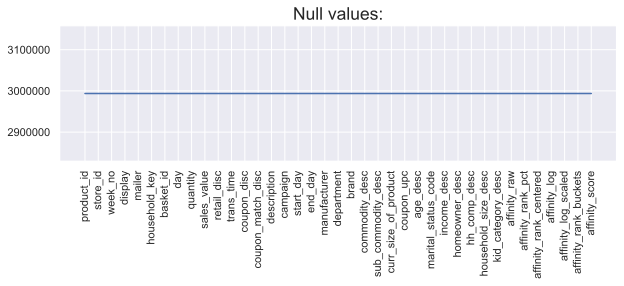

In [8]:
plt.figure(figsize=(10, 2.5))
plt.plot(df.isnull().count())
plt.title('Null values:', size=17.5)
plt.xticks(rotation=90)
plt.show()

In [44]:
df.describe()

,product_id,store_id,week_no,household_key,basket_id,day,quantity,sales_value,retail_disc,trans_time,coupon_disc,coupon_match_disc,campaign,start_day,end_day,manufacturer,coupon_upc,affinity_raw,affinity_rank_pct,affinity_rank_centered,affinity_log,affinity_log_scaled,affinity_rank_buckets,affinity_score
count,2.993709e+06,2.993709e+06,2.993709e+06,2.993709e+06,2.993709e+06,2.993709e+06,2.993709e+06,2.993709e+06,2.993709e+06,2.993709e+06,2.993709e+06,2.993709e+06,2.993709e+06,2.993709e+06,2.993709e+06,2.993709e+06,1.290000e+03,2.993709e+06,2.993709e+06,2.993709e+06,2.993709e+06,2.993709e+06,2.993709e+06,2.993709e+06
mean,2.827480e+06,3.209142e+03,5.617037e+01,1.300469e+03,3.389715e+10,3.883730e+02,1.397602e+00,2.764757e+00,-1.220787e+00,1.561020e+03,-1.367701e-02,-3.049729e-04,1.583862e+01,4.999393e+02,5.450567e+02,9.087650e+02,3.004184e+10,4.809269e+00,5.000002e-01,-2.747777e-03,9.332111e-01,4.070214e-01,3.104097e+00,3.104097e+00
std,3.779352e+06,9.051809e+03,2.570177e+01,7.478272e+02,4.488403e+09,1.799220e+02,1.024771e+00,2.958565e+00,1.842765e+00,3.916353e+02,2.102166e-01,1.864501e-02,6.815299e+00,1.122738e+02,1.141847e+02,1.202804e+03,2.183821e+10,2.362375e+01,2.883431e-01,5.782709e-01,9.688014e-01,7.119822e-02,1.295453e+00,1.295453e+00
min,8.189800e+05,2.860000e+02,9.000000e+00,1.000000e+00,2.762059e+10,5.500000e+01,0.000000e+00,0.000000e+00,-1.300200e+02,0.000000e+00,-5.500000e+01,-5.000000e+00,1.000000e+00,2.240000e+02,2.640000e+02,2.000000e+00,1.000009e+10,0.000000e+00,2.740580e-03,-1.000000e+00,-4.605170e+00,0.000000e+00,1.000000e+00,1.000000e+00
25%,9.118120e+05,3.300000e+02,3.500000e+01,6.760000e+02,3.057956e+10,2.380000e+02,1.000000e+00,1.000000e+00,-1.520000e+00,1.309000e+03,0.000000e+00,0.000000e+00,1.000000e+01,4.120000e+02,4.600000e+02,6.900000e+01,1.000009e+10,1.250000e+00,2.532599e-01,-4.975844e-01,2.231436e-01,3.548378e-01,2.000000e+00,2.000000e+00
50%,1.020581e+06,3.720000e+02,5.600000e+01,1.316000e+03,3.275994e+10,3.890000e+02,1.000000e+00,2.000000e+00,-7.500000e-01,1.613000e+03,0.000000e+00,0.000000e+00,1.600000e+01,5.040000e+02,5.510000e+02,5.310000e+02,1.000009e+10,2.290000e+00,5.006921e-01,-1.360072e-03,8.285518e-01,3.993299e-01,3.000000e+00,3.000000e+00
75%,1.130581e+06,4.220000e+02,7.700000e+01,1.985000e+03,3.584099e+10,5.350000e+02,2.000000e+00,3.000000e+00,-2.600000e-01,1.839000e+03,0.000000e+00,0.000000e+00,2.000000e+01,5.870000e+02,6.420000e+02,1.208000e+03,5.370004e+10,4.000000e+00,7.361175e-01,4.707846e-01,1.386294e+00,4.403189e-01,4.000000e+00,4.000000e+00
max,1.814887e+07,3.428000e+04,1.010000e+02,2.500000e+03,4.221212e+10,7.050000e+02,7.400000e+01,3.247500e+02,3.990000e+00,2.359000e+03,0.000000e+00,0.000000e+00,3.000000e+01,6.590000e+02,7.190000e+02,6.474000e+03,5.794006e+10,8.118750e+03,1.000000e+00,1.000000e+00,9.001931e+00,1.000000e+00,5.000000e+00,5.000000e+00


# 4.0 Data Analysis:

In [69]:
df.shape

(2993709, 39)

TypeError: unsupported format string passed to numpy.ndarray.__format__

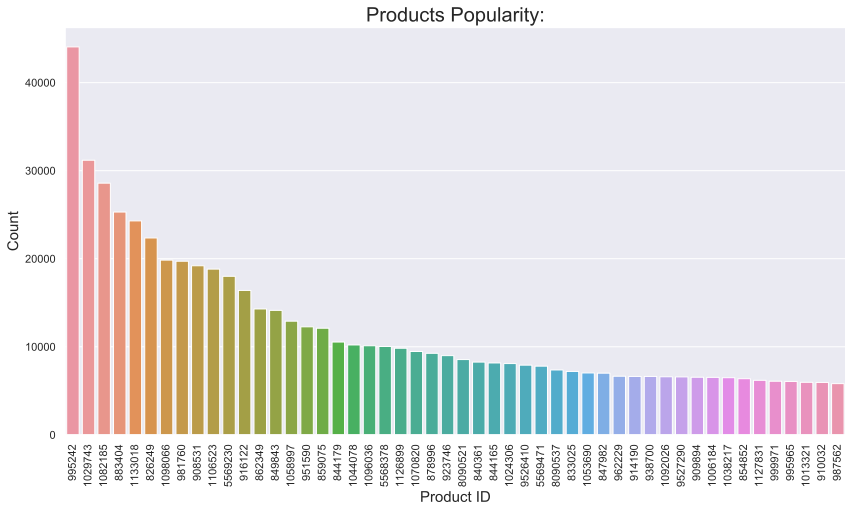

In [93]:
# Analysing which products are purchased most often:
idx = df.product_id.value_counts().index
product_count = df.product_id.value_counts().values
percentage = product_count / (df.shape[0] * 100)

plt.figure(figsize=(14, 7.5))
sns.countplot(df.product_id, order=idx[:50])
plt.title('Products Popularity:', size=20)
plt.xlabel('Product ID', size=15)
plt.ylabel('Count', size=15)
plt.xticks(rotation=90)



for p in ax.patches:
    x = p.get_bbox().get_points()[:,0]
    y = p.get_bbox().get_points()[1,1]
    
    ax.annotate('{:.1f}%'.format(percentage[:50]))
#     ax.annotate('{:.1f}%'.format(percentage), (x.mean(), y), ha='center', va='bottom') # set the alignment of the text
    
plt.show()

print(percentage)

In [41]:
sns.regplot(df.product_id, df.product_id.sum())

ValueError: all the input array dimensions except for the concatenation axis must match exactly

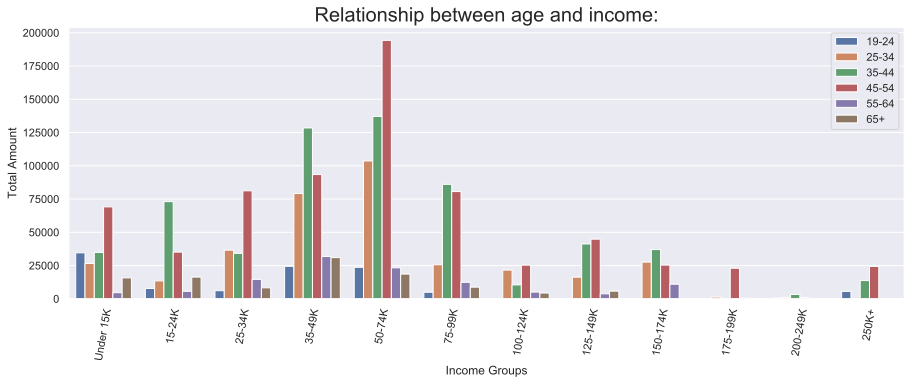

In [61]:
# Analysing relationship between age and income:
sorted_income = ['Under 15K', '15-24K', '25-34K', '35-49K', '50-74K', '75-99K', '100-124K', '125-149K', '150-174K', '175-199K', '200-249K', '250K+']

plt.figure(figsize=(15, 5))
_ = sns.countplot(x='income_desc', data=df, hue='age_desc', order=sorted_income)
_ = plt.title('Relationship between age and income:', size=20)
_ = plt.xlabel('Income Groups')
_ = plt.ylabel('Total Amount')
_ = plt.xticks(rotation=80)
_ = plt.legend(loc='upper right')
plt.show()

In [51]:
df.age_desc.value_counts()

45-54    697269
35-44    599350
25-34    352597
55-64    112588
65+      108852
19-24    107555
Name: age_desc, dtype: int64

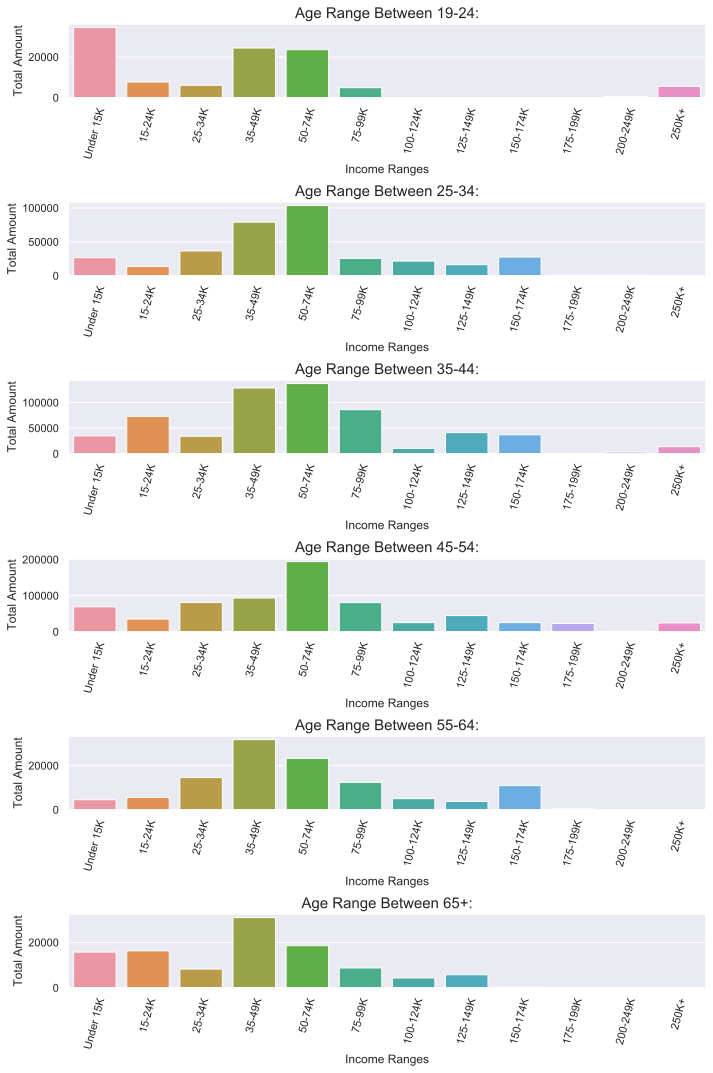

In [55]:
# Comparing which age group uses more coupons:
df_19_24 = pd.DataFrame(df[df['age_desc'] == '19-24'])
df_25_34 = pd.DataFrame(df[df['age_desc'] == '25-34'])
df_35_44 = pd.DataFrame(df[df['age_desc'] == '35-44'])
df_45_54 = pd.DataFrame(df[df['age_desc'] == '45-54'])
df_55_65 = pd.DataFrame(df[df['age_desc'] == '55-64'])
df_65_plus = pd.DataFrame(df[df['age_desc'] == '65+'])

plt.figure(figsize=(10, 15))

plt.subplot(6, 1, 1)
_ = sns.countplot(df_19_24['income_desc'], order=sorted_income)
_ = plt.title('Age Range Between 19-24:', size=15)
_ = plt.xlabel('Income Ranges')
_ = plt.ylabel('Total Amount')
_ = plt.xticks(rotation=75)

plt.subplot(6, 1, 2)
_ = sns.countplot(df_25_34['income_desc'], order=sorted_income)
_ = plt.title('Age Range Between 25-34:', size=15)
_ = plt.xlabel('Income Ranges')
_ = plt.ylabel('Total Amount')
_ = plt.xticks(rotation=75)

plt.subplot(6, 1, 3)
_ = sns.countplot(df_35_44['income_desc'], order=sorted_income)
_ = plt.title('Age Range Between 35-44:', size=15)
_ = plt.xlabel('Income Ranges')
_ = plt.ylabel('Total Amount')
_ = plt.xticks(rotation=75)

plt.subplot(6, 1, 4)
_ = sns.countplot(df_45_54['income_desc'], order=sorted_income)
_ = plt.title('Age Range Between 45-54:', size=15)
_ = plt.xlabel('Income Ranges')
_ = plt.ylabel('Total Amount')
_ = plt.xticks(rotation=75)

plt.subplot(6, 1, 5)
_ = sns.countplot(df_55_65['income_desc'], order=sorted_income)
_ = plt.title('Age Range Between 55-64:', size=15)
_ = plt.xlabel('Income Ranges')
_ = plt.ylabel('Total Amount')
_ = plt.xticks(rotation=75)

plt.subplot(6, 1, 6)
_ = sns.countplot(df_65_plus['income_desc'], order=sorted_income)
_ = plt.title('Age Range Between 65+:', size=15)
_ = plt.xlabel('Income Ranges')
_ = plt.ylabel('Total Amount')
_ = plt.xticks(rotation=75)

plt.tight_layout()
plt.show()

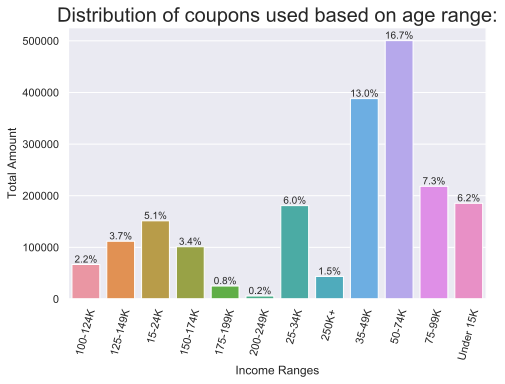

In [57]:
plt.figure(figsize=(7.5, 5))
ax = sns.countplot(df['income_desc'])
_ = plt.title('Distribution of coupons used based on age range:', size=20)
_ = plt.xlabel('Income Ranges')
_ = plt.ylabel('Total Amount')
_ = plt.xticks(rotation=75)

# https://stackoverflow.com/questions/33179122/seaborn-countplot-with-frequencies/33259038
for p in ax.patches:
    x = p.get_bbox().get_points()[:,0]
    y = p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100. * y / len(df)), (x.mean(), y), ha='center', va='bottom') # set the alignment of the text

# 5.0 Correlation of columns:

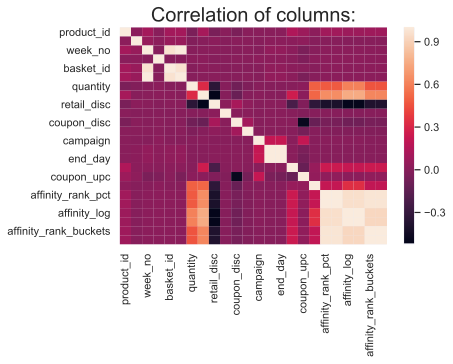

In [11]:
corr = df.corr()
sns.heatmap(corr)
plt.title('Correlation of columns:', size=20)
plt.show()

In [12]:
# Creating ECDF, formula copied from Springboard:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

In [13]:
# x, y = ecdf(df['product_id'])
# _ = plt.plot(x, y, marker='.', linestyle='none')

In [15]:
df.columns

Index(['product_id', 'store_id', 'week_no', 'display', 'mailer',
       'household_key', 'basket_id', 'day', 'quantity', 'sales_value',
       'retail_disc', 'trans_time', 'coupon_disc', 'coupon_match_disc',
       'description', 'campaign', 'start_day', 'end_day', 'manufacturer',
       'department', 'brand', 'commodity_desc', 'sub_commodity_desc',
       'curr_size_of_product', 'coupon_upc', 'age_desc', 'marital_status_code',
       'income_desc', 'homeowner_desc', 'hh_comp_desc', 'household_size_desc',
       'kid_category_desc', 'affinity_raw', 'affinity_rank_pct',
       'affinity_rank_centered', 'affinity_log', 'affinity_log_scaled',
       'affinity_rank_buckets', 'affinity_score'],
      dtype='object')

In [27]:
first_customer = pd.DataFrame(df[df.groupby['household_key']])

TypeError: 'method' object is not subscriptable